In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os

In [2]:
# Set filepath
rep='/home/ebb505/ARE_Project/are-logs/PPSN/'

repBase='/home/ebb505/ARE_Project/are-logs/PPSN/BL/'
repNov='/home/ebb505/ARE_Project/are-logs/PPSN/NS/'
repNSGR='/home/ebb505/ARE_Project/are-logs/PPSN/GRi/'
repGRe='/home/ebb505/ARE_Project/are-logs/PPSN/GRe/'

filename='noreptests.csv'

In [3]:
# Get all directories
foldBase = []
foldNov = []
foldNSGR = []
foldGRe = []
# r=root, d=directories, f = files
for r, d, f in os.walk(repBase):
    for folder in d:
        foldBase.append(os.path.join(r, folder))
        # r=root, d=directories, f = files
for r, d, f in os.walk(repNov):
    for folder in d:
        foldNov.append(os.path.join(r, folder))
for r, d, f in os.walk(repNSGR):
    for folder in d:
        foldNSGR.append(os.path.join(r, folder))
for r, d, f in os.walk(repGRe):
    for folder in d:
        foldGRe.append(os.path.join(r, folder))

In [4]:
# See directories
print("RS: ",len(foldBase))
print("NS: ",len(foldNov))
print("GRi: ",len(foldNSGR))
print("GRe: ",len(foldGRe))

RS:  18
NS:  18
GRi:  29
GRe:  15


In [5]:
# Get information from files
repBase = []
for f in foldBase:
    my_list = []
    with open(f + '/' + filename, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    repBase.append(my_list)
repNov = []
for f in foldNov:
    my_list = []
    with open(f + '/' + filename, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    repNov.append(my_list)
repNSGR = []
for f in foldNSGR:
    my_list = []
    with open(f + '/' + filename, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    repNSGR.append(my_list)
repGRe = []
for f in foldGRe:
    my_list = []
    with open(f + '/' + filename, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:]) # Last character is empty for some reason
    repGRe.append(my_list)

In [6]:
population = 40
#replicates = len(repBase)
replicates = 15
evaluations = len(repBase[0])
#evaluations = 20000
features = len(repBase[0][0])
generations = int(evaluations / population)
print("Replicates: ", replicates, "Evaluations: ", evaluations, "Features: ", features, "Generations: ", generations)

Replicates:  15 Evaluations:  14861 Features:  6 Generations:  371


In [7]:
# Base
sumRepSkeletonBase = []
sumRepHeadConnetedBase = []
sumRepNoCollisionsBase = []
sumRepNoBadOrientationsBase = []
sumRepGripperAccessBase = []
for i in range(replicates):
    evaluations = len(repBase[i])
    dat = np.array([[float(y) for y in x] for x in repBase[i]]) # Convert to array
    sumRepSkeletonBase.append(sum(dat[:evaluations,1] > 0)/evaluations)
    sumRepNoCollisionsBase.append(sum(dat[:evaluations,2] > 0)/evaluations)
    sumRepNoBadOrientationsBase.append(sum(dat[:evaluations,3] > 0)/evaluations)
    sumRepHeadConnetedBase.append(sum(dat[:evaluations,4] > 0)/evaluations)
    sumRepGripperAccessBase.append(sum(dat[:evaluations,5] > 0)/evaluations)
    print(i)
print("Done!")
# Pure Novelty
sumRepSkeletonNov = []
sumRepHeadConnetedNov = []
sumRepNoCollisionsNov = []
sumRepNoBadOrientationsNov = []
sumRepGripperAccessNov = []
for i in range(replicates):
    evaluations = len(repBase[i])
    dat = np.array([[float(y) for y in x] for x in repNov[i]]) # Convert to array
    sumRepSkeletonNov.append(sum(dat[:evaluations,1] > 0)/evaluations)
    sumRepNoCollisionsNov.append(sum(dat[:evaluations,2] > 0)/evaluations)
    sumRepNoBadOrientationsNov.append(sum(dat[:evaluations,3] > 0)/evaluations)
    sumRepHeadConnetedNov.append(sum(dat[:evaluations,4] > 0)/evaluations)
    sumRepGripperAccessNov.append(sum(dat[:evaluations,5] > 0)/evaluations)
    print(i)
print("Done!")
# Pure Novelty + Gene Repression
sumRepSkeletonNSGR = []
sumRepHeadConnetedNSGR = []
sumRepNoCollisionsNSGR = []
sumRepNoBadOrientationsNSGR = []
sumRepGripperAccessNSGR = []
for i in range(replicates):
    evaluations = len(repBase[i])
    dat = np.array([[float(y) for y in x] for x in repNSGR[i]]) # Convert to array
    sumRepSkeletonNSGR.append(sum(dat[:evaluations,1] > 0)/evaluations)
    sumRepNoCollisionsNSGR.append(sum(dat[:evaluations,2] > 0)/evaluations)
    sumRepNoBadOrientationsNSGR.append(sum(dat[:evaluations,3] > 0)/evaluations)
    sumRepHeadConnetedNSGR.append(sum(dat[:evaluations,4] > 0)/evaluations)
    
    sumRepGripperAccessNSGR.append(sum(dat[:evaluations,5] > 0)/evaluations)
    print(i)
print("Done!")
# GRe
sumRepSkeletonGRe = []
sumRepHeadConnetedGRe = []
sumRepNoCollisionsGRe = []
sumRepNoBadOrientationsGRe = []
sumRepGripperAccessGRe = []
for i in range(replicates):
    evaluations = len(repBase[i])
    dat = np.array([[float(y) for y in x] for x in repGRe[i]]) # Convert to array
    sumRepSkeletonGRe.append(sum(dat[:evaluations,1] > 0)/evaluations)
    sumRepNoCollisionsGRe.append(sum(dat[:evaluations,2] > 0)/evaluations)
    sumRepNoBadOrientationsGRe.append(sum(dat[:evaluations,3] > 0)/evaluations)
    sumRepHeadConnetedGRe.append(sum(dat[:evaluations,4] > 0)/evaluations)
    sumRepGripperAccessGRe.append(sum(dat[:evaluations,5] > 0)/evaluations)
    print(i)
print("Done!")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Done!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Done!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Done!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Done!


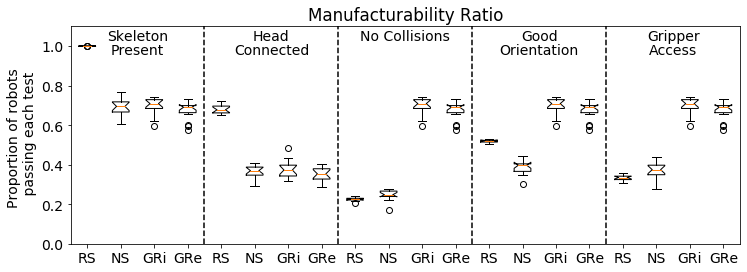

In [13]:
font = {'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

plt.figure(figsize=(12, 4))

# Plot box plot stuff
plt.boxplot([sumRepSkeletonBase, sumRepSkeletonNov, sumRepSkeletonNSGR, sumRepSkeletonGRe,\
             sumRepHeadConnetedBase,sumRepHeadConnetedNov, sumRepHeadConnetedNSGR, sumRepHeadConnetedGRe,\
            sumRepNoCollisionsBase, sumRepNoCollisionsNov, sumRepNoCollisionsNSGR, sumRepNoCollisionsGRe,\
            sumRepNoBadOrientationsBase, sumRepNoBadOrientationsNov, sumRepNoBadOrientationsNSGR, sumRepNoBadOrientationsGRe,\
            sumRepGripperAccessBase, sumRepGripperAccessNov, sumRepGripperAccessNSGR, sumRepGripperAccessGRe] \
            , notch=True)

plt.plot([4.5,4.5],[0,1.1],'k--')
plt.plot([8.5,8.5],[0,1.1],'k--')
plt.plot([12.5,12.5],[0,1.1],'k--')
plt.plot([16.5,16.5],[0,1.1],'k--')
#Label and stuff
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.ylabel('Proportion of robots \n passing each test')
plt.title("Manufacturability Ratio")

rangeX = ['RS', 'NS', 'GRi', 'GRe', 'RS', 'NS', 'GRi', 'GRe', 'RS', 'NS', 'GRi', 'GRe', 'RS', 'NS', 'GRi', 'GRe', 'RS', 'NS', 'GRi', 'GRe', 'RS', 'NS', 'GRi', 'RS', 'NS', 'GRi', 'GRe', 'RS', 'NS', 'GRi' 'GRe' ] 
posX = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] 
plt.xticks(posX,rangeX)

plt.text(2.5,1.05,'Skeleton',horizontalalignment='center', verticalalignment='center')
plt.text(2.5,0.98,'Present',horizontalalignment='center', verticalalignment='center')

plt.text(6.5,1.05,'Head',horizontalalignment='center', verticalalignment='center')
plt.text(6.5,0.98,'Connected',horizontalalignment='center', verticalalignment='center')

plt.text(10.5,1.05,'No Collisions',horizontalalignment='center', verticalalignment='center')
plt.text(14.5,1.05,'Good',horizontalalignment='center', verticalalignment='center')
plt.text(14.5,0.98,'Orientation',horizontalalignment='center', verticalalignment='center')
plt.text(18.5,1.05,'Gripper',horizontalalignment='center', verticalalignment='center')
plt.text(18.5,0.98,'Access',horizontalalignment='center', verticalalignment='center')

plt.savefig(rep+'ManRatExpComp.png', dpi=200)